In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

In [4]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Gender    500 non-null object
Height    500 non-null int64
Weight    500 non-null int64
Index     500 non-null int64
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


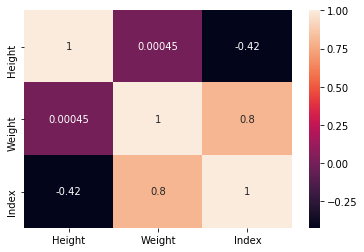

In [8]:
sns.heatmap(df.corr(), annot=True)

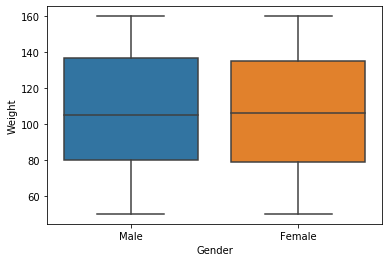

In [9]:
sns.boxplot(x= df['Gender'], y = df['Weight'])

In [14]:
from sklearn.preprocessing import LabelEncoder
conv = LabelEncoder()
df['Genders']= conv.fit_transform(df[['Gender']])

In [35]:
df2= pd.get_dummies(df['Index'])
df2.head()

,0,1,2,3,4,5
0,0,0,0,0,1,0
1,0,0,1,0,0,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0


In [24]:
df.head()

,Gender,Height,Weight,Index,Genders
0,Male,174,96,4,1
1,Male,189,87,2,1
2,Female,185,110,4,0
3,Female,195,104,3,0
4,Male,149,61,3,1


In [34]:
df3 = df.drop(['Gender','Index'],axis=1)
df3.head()

,Height,Weight,Genders
0,174,96,1
1,189,87,1
2,185,110,0
3,195,104,0
4,149,61,1


In [39]:
final = pd.concat([df2,df3],axis=1)

In [40]:
final

,0,1,2,3,4,5,Height,Weight,Genders
0,0,0,0,0,1,0,174,96,1
1,0,0,1,0,0,0,189,87,1
2,0,0,0,0,1,0,185,110,0
3,0,0,0,1,0,0,195,104,0
4,0,0,0,1,0,0,149,61,1
...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,1,150,153,0
496,0,0,0,0,1,0,184,121,0
497,0,0,0,0,0,1,141,136,0
498,0,0,0,0,0,1,150,95,1


In [44]:
lr = LinearRegression()
x = final.drop(['Weight'],axis=1)
y = final['Height']
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state=99)

lr.fit(x_train,y_train)

predict = lr.predict(x_test)

print(mean_squared_error(y_test,predict))
print(r2_score(y_test, predict))
print(mean_absolute_error(y_test,predict))

0.0
1.0
0.0


In [45]:
lr.intercept_

2.842170943040401e-14